In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('Country-data.csv')
country_names = np.asarray(df['country'])
df.drop('country', axis=1, inplace=True)


df_columns = df.columns
df.shape

(167, 9)

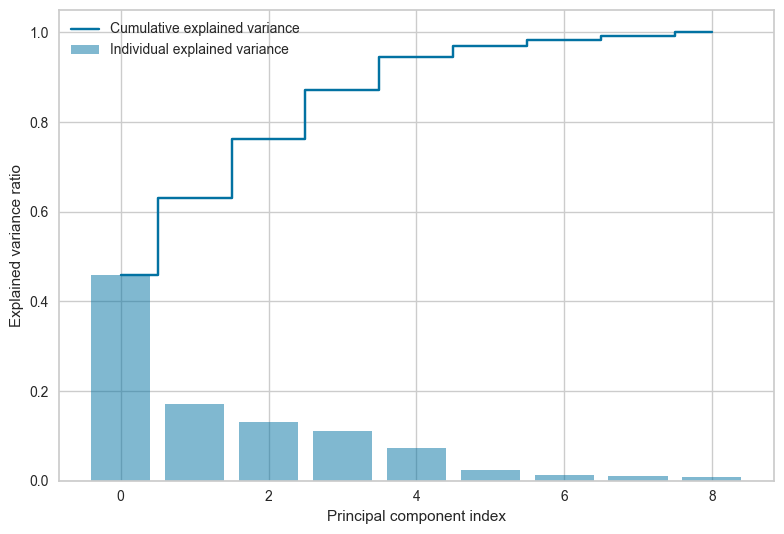

In [80]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
sc = StandardScaler()
sc.fit(df)
X_train_std = sc.transform(df)
#X_test_std = sc.transform(X_test)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

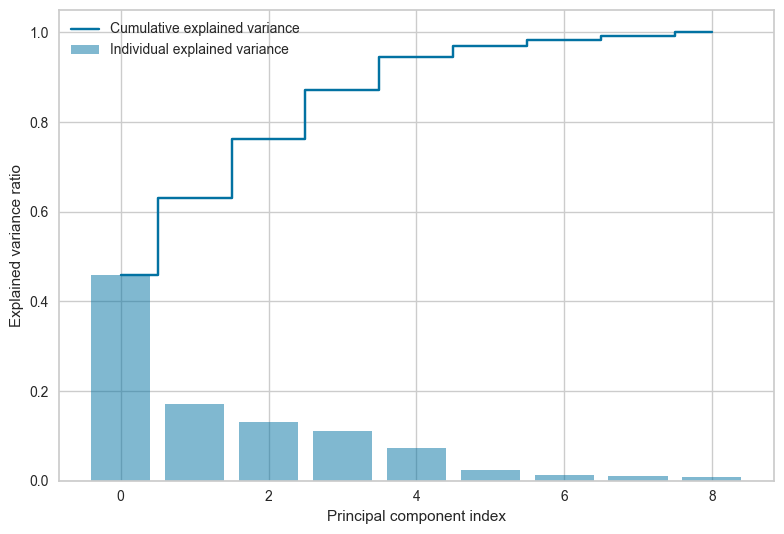

In [81]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
X_train_std = sc.transform(df)
#X_test_std = sc.transform(X_test)
#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [82]:
print(X_train_pca[:,:5].shape)

(167, 5)


In [83]:
reducted_data = np.copy(X_train_pca[:,:5])

In [84]:
standard_df = sc.transform(df)

In [85]:
features_to_plot = ['gdpp', 'life_expec','inflation']

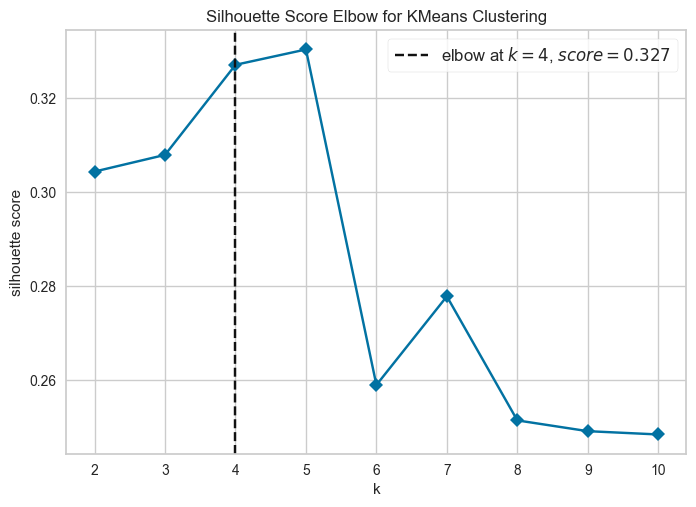

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), timings=False, metric='silhouette'
)

visualizer.fit(reducted_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(reducted_data) 
labels = kmeans.labels_

In [88]:
import sklearn.metrics
sklearn.metrics.silhouette_score(standard_df, labels)

0.301375962376881

In [89]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 1, 'Albania': 2, 'Algeria': 2, 'Angola': 1, 'Antigua and Barbuda': 2, 'Argentina': 2, 'Armenia': 2, 'Australia': 0, 'Austria': 0, 'Azerbaijan': 2, 'Bahamas': 2, 'Bahrain': 2, 'Bangladesh': 2, 'Barbados': 2, 'Belarus': 2, 'Belgium': 0, 'Belize': 2, 'Benin': 1, 'Bhutan': 2, 'Bolivia': 2, 'Bosnia and Herzegovina': 2, 'Botswana': 1, 'Brazil': 2, 'Brunei': 0, 'Bulgaria': 2, 'Burkina Faso': 1, 'Burundi': 1, 'Cambodia': 2, 'Cameroon': 1, 'Canada': 0, 'Cape Verde': 2, 'Central African Republic': 1, 'Chad': 1, 'Chile': 2, 'China': 2, 'Colombia': 2, 'Comoros': 1, 'Congo, Dem. Rep.': 1, 'Congo, Rep.': 1, 'Costa Rica': 2, "Cote d'Ivoire": 1, 'Croatia': 2, 'Cyprus': 0, 'Czech Republic': 2, 'Denmark': 0, 'Dominican Republic': 2, 'Ecuador': 2, 'Egypt': 2, 'El Salvador': 2, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Estonia': 2, 'Fiji': 2, 'Finland': 0, 'France': 0, 'Gabon': 1, 'Gambia': 1, 'Georgia': 2, 'Germany': 0, 'Ghana': 1, 'Greece': 0, 'Grenada': 2, 'Guatemala': 2, 'Guinea': 1, 'Gui

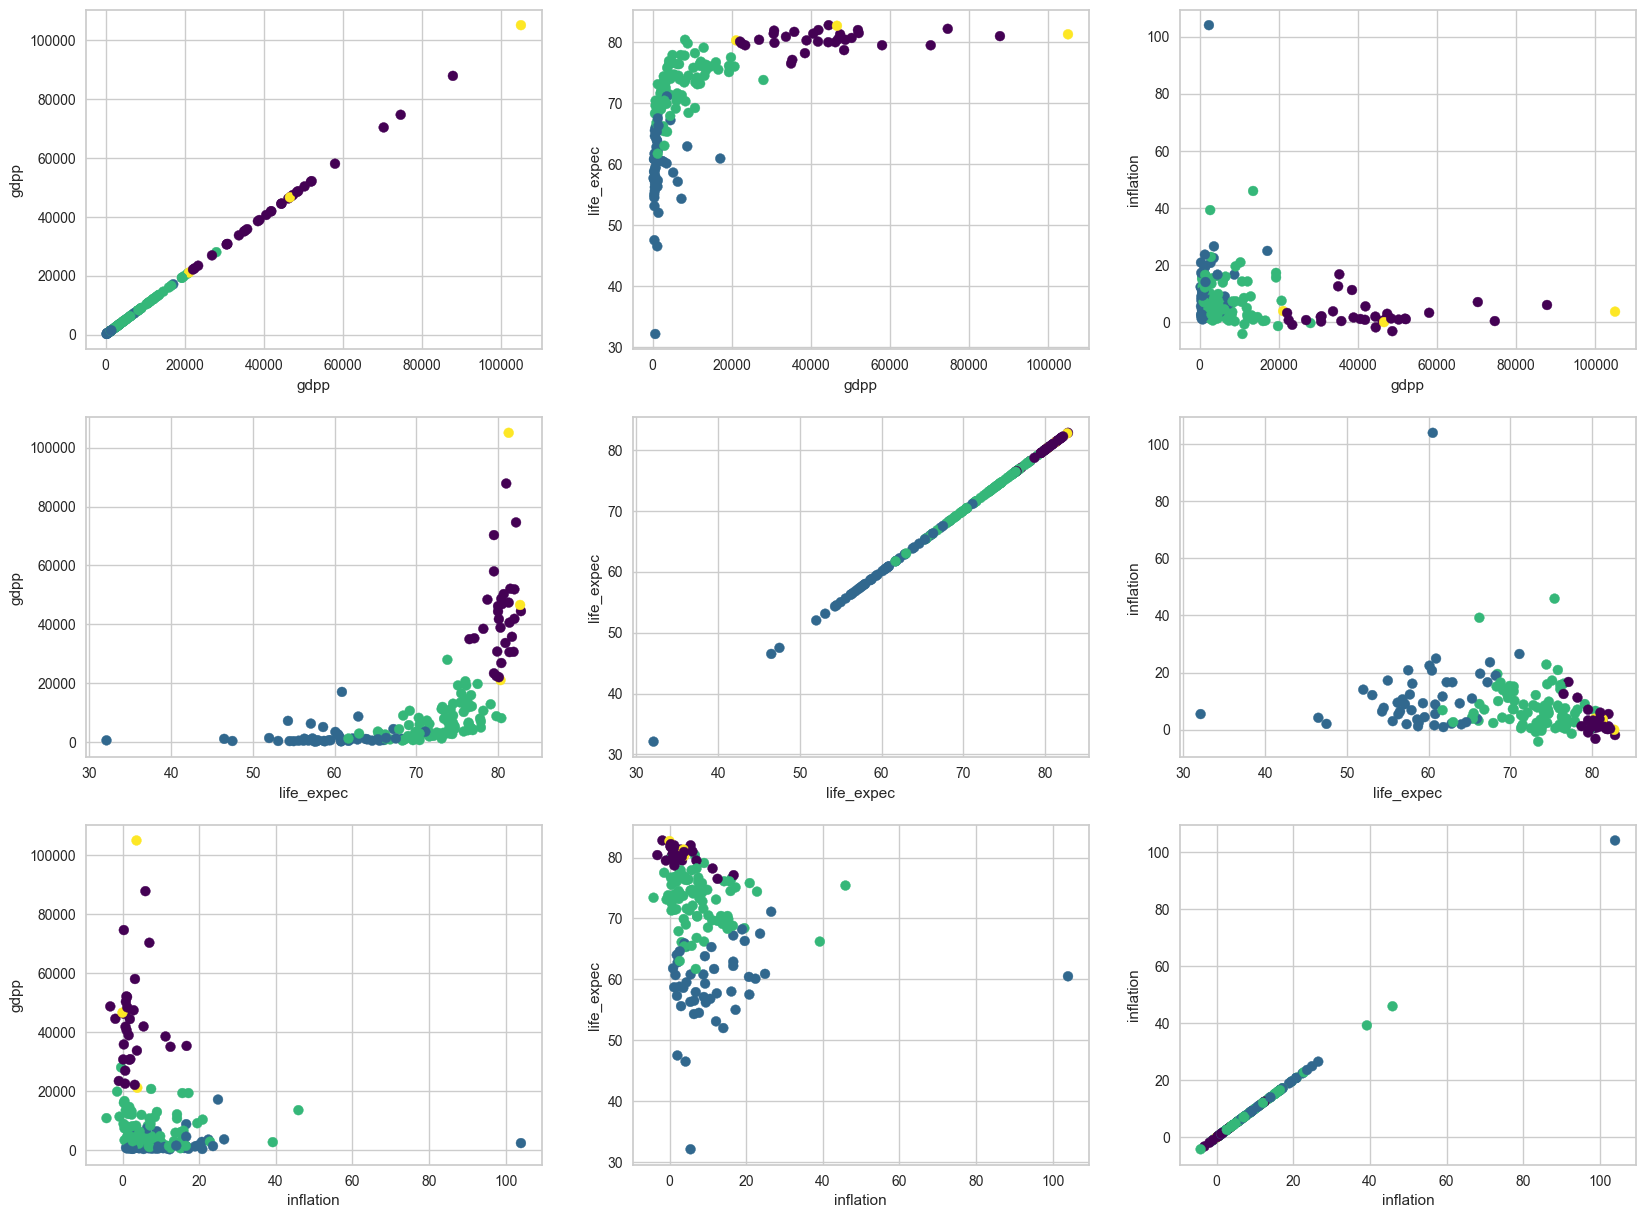

In [90]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

In [91]:
from sklearn.mixture import GaussianMixture

silhouette_scores = []
for i in range(2, 11): 
    gm = GaussianMixture(n_components=i, random_state=0)
    gm.fit(reducted_data) 
    silhouette_scores.append(sklearn.metrics.silhouette_score(reducted_data, gm.predict(reducted_data)))

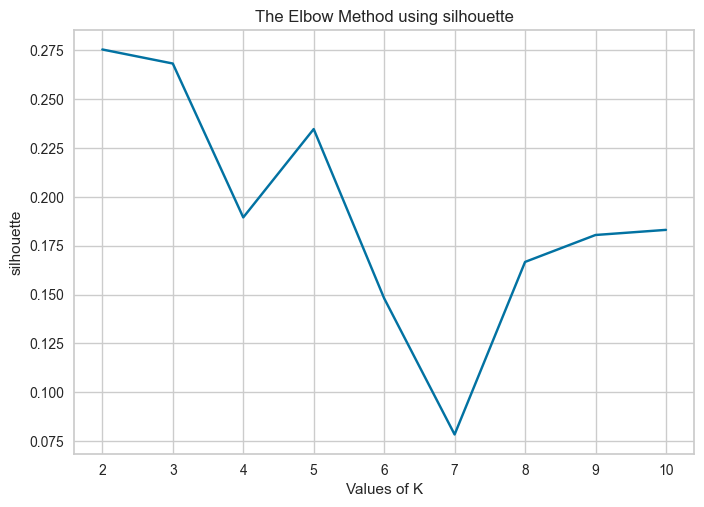

In [92]:
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('The Elbow Method using silhouette')
plt.show()

In [93]:
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(reducted_data) 
labels = gm.predict(reducted_data)

In [94]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.2572930164575595

In [95]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 0, 'Angola': 0, 'Antigua and Barbuda': 1, 'Argentina': 0, 'Armenia': 1, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 1, 'Bahrain': 1, 'Bangladesh': 0, 'Barbados': 1, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 1, 'Botswana': 0, 'Brazil': 1, 'Brunei': 1, 'Bulgaria': 1, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 1, 'China': 1, 'Colombia': 1, 'Comoros': 0, 'Congo, Dem. Rep.': 0, 'Congo, Rep.': 0, 'Costa Rica': 1, "Cote d'Ivoire": 0, 'Croatia': 1, 'Cyprus': 1, 'Czech Republic': 1, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 0, 'Eritrea': 0, 'Estonia': 1, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 0, 'Gambia': 0, 'Georgia': 0, 'Germany': 1, 'Ghana': 0, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 0, 'Gui

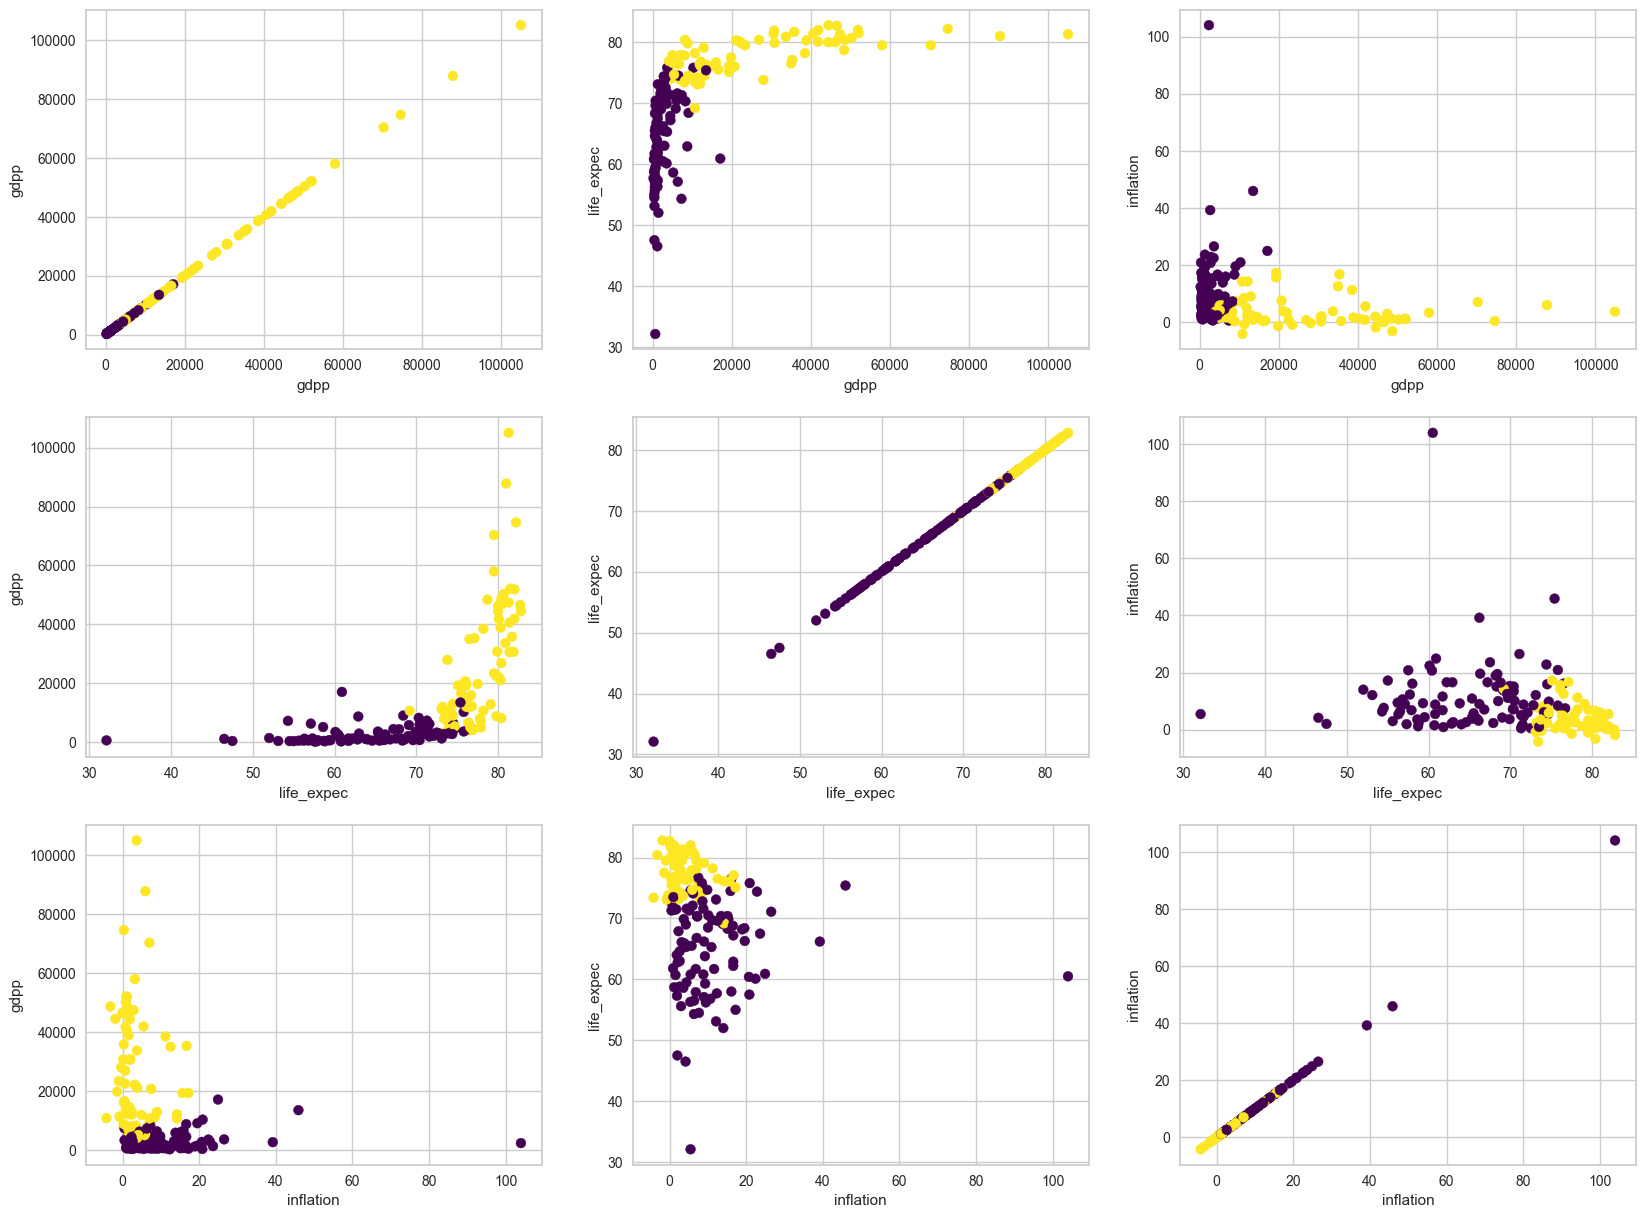

In [96]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

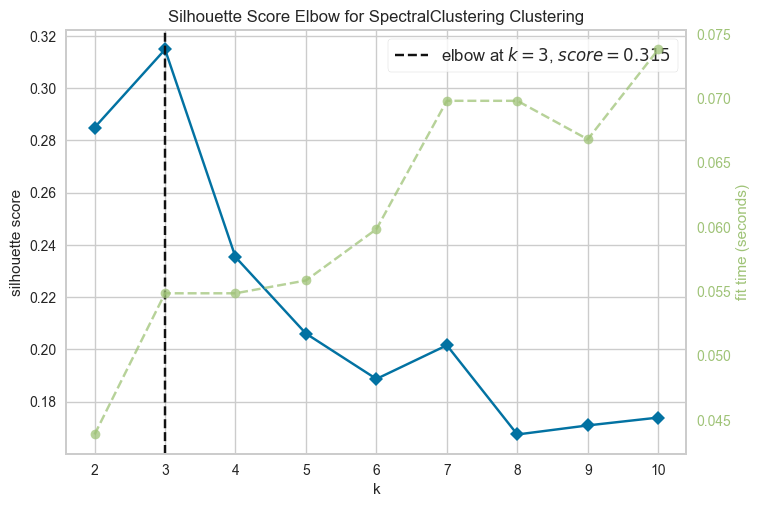

<AxesSubplot: title={'center': 'Silhouette Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [97]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(affinity='nearest_neighbors', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette'
)

visualizer.fit(reducted_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [98]:
model = SpectralClustering(n_clusters=3,
         affinity='nearest_neighbors',
         random_state=0)

clustering = model.fit(reducted_data)
labels = clustering.labels_


In [99]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.29227087498435367

In [100]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 2, 'Albania': 0, 'Algeria': 0, 'Angola': 2, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 0, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 2, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 2, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 2, 'Burundi': 2, 'Cambodia': 0, 'Cameroon': 2, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 2, 'Chad': 2, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 2, 'Costa Rica': 0, "Cote d'Ivoire": 2, 'Croatia': 0, 'Cyprus': 0, 'Czech Republic': 0, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 2, 'Gambia': 2, 'Georgia': 0, 'Germany': 1, 'Ghana': 2, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 2, 'Gui

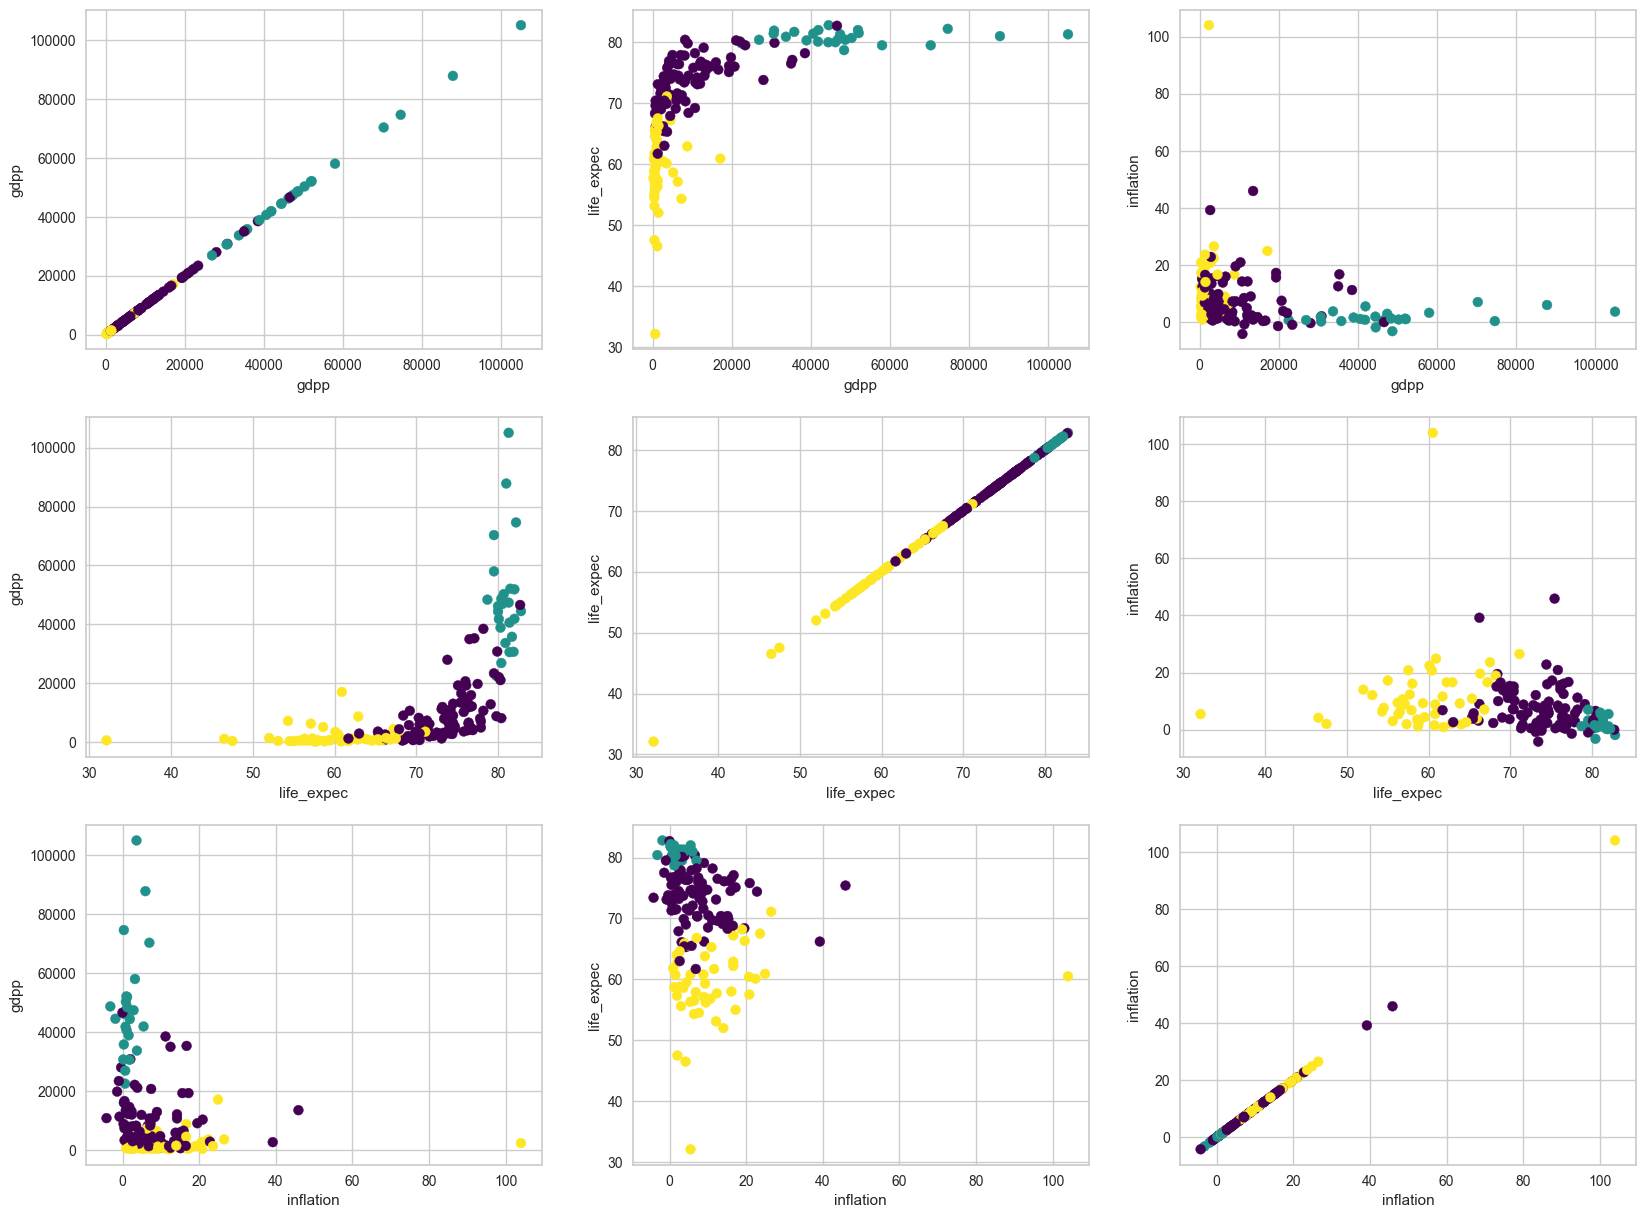

In [101]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()